In [65]:
import warnings
warnings.filterwarnings("ignore") 

In [66]:
import pandas as pd 
df=pd.read_csv('C:\\workplace\\power-consumption\\dataset\\powerconsumption.csv')
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [67]:
#df['Datetime']=
df['Datetime']=pd.to_datetime(df['Datetime']).dt.strftime('%Y-%m-%d %H:00')
df=df.groupby('Datetime').agg({ 'Temperature':'mean', 'Humidity':'mean', 'WindSpeed':'mean',
       'GeneralDiffuseFlows':'mean', 'DiffuseFlows':'mean', 'PowerConsumption_Zone1':'mean',
       'PowerConsumption_Zone2':'mean', 'PowerConsumption_Zone3':'mean'}).reset_index()

In [68]:
df['PowerConsumption']=df[['PowerConsumption_Zone1','PowerConsumption_Zone2', 'PowerConsumption_Zone3']].apply('mean',axis=1)
df.drop(['PowerConsumption_Zone1','PowerConsumption_Zone2', 'PowerConsumption_Zone3'],axis=1,inplace=True)
df.index=df['Datetime']
df.drop('Datetime',axis=1,inplace=True)

In [69]:
df.to_csv('C:\\workplace\\power-consumption\\dataset\\processed.csv')

In [70]:
import matplotlib.pyplot as plt 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

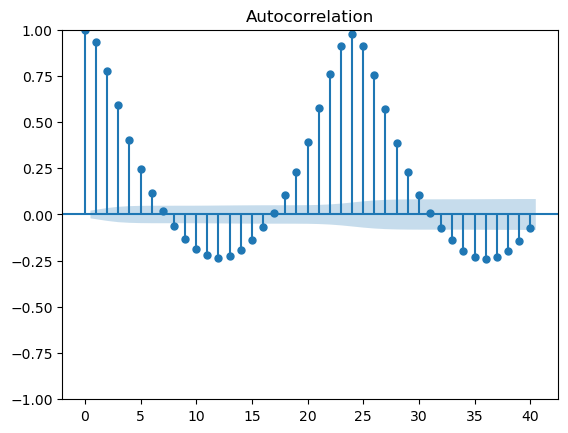

In [71]:
plot_acf(df['PowerConsumption'])
plt.show()

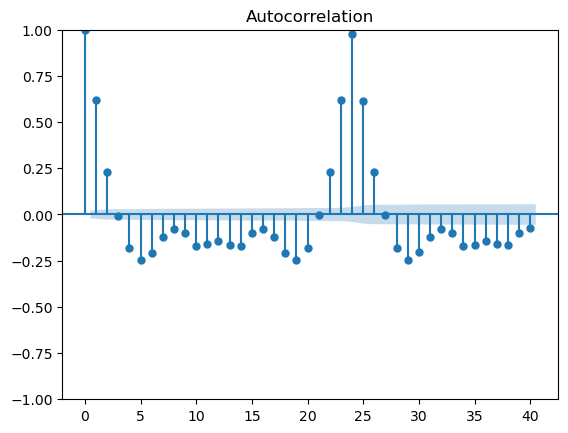

In [72]:
plot_acf(df['PowerConsumption'].diff(1).dropna())
plt.show()

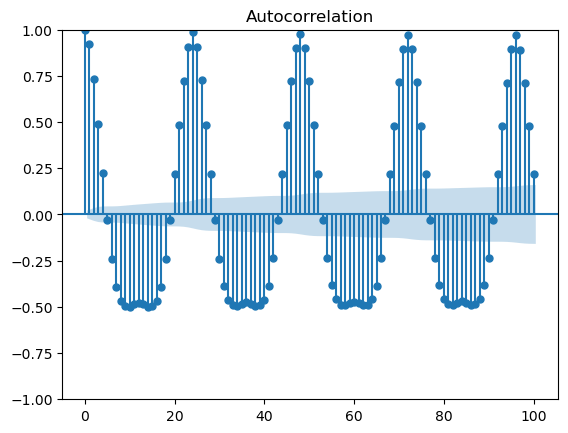

In [73]:
plot_acf(df['PowerConsumption'].diff(7).dropna(),lags=100)
plt.show()

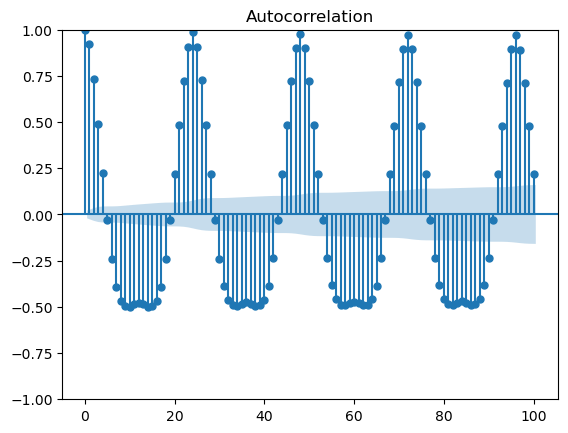

In [74]:
plot_acf(df['PowerConsumption'].diff(7).dropna(),lags=100)
plt.show()

In [75]:
from statsmodels.tsa.stattools import ccf

In [76]:
df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption
Datetime,,,,,,
2017-01-01 00:00,6.196833,75.066667,0.081833,0.063500,0.098833,22158.923532
2017-01-01 01:00,5.548833,77.583333,0.082000,0.056833,0.112500,19259.508737
2017-01-01 02:00,5.054333,78.933333,0.082333,0.063000,0.129167,17363.293880
2017-01-01 03:00,5.004333,77.083333,0.082833,0.059833,0.141000,16304.815849
2017-01-01 04:00,5.097667,74.050000,0.082333,0.058000,0.122833,15904.879449


<Axes: >

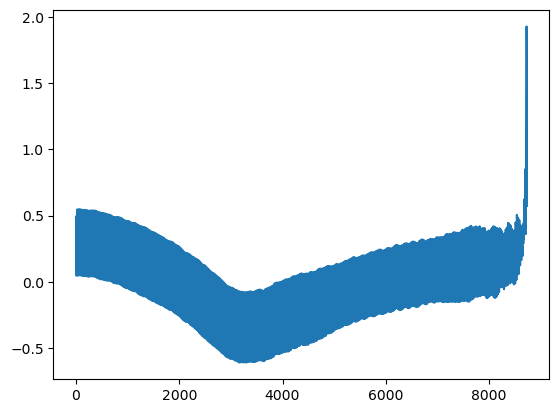

In [77]:
pd.Series(ccf(df['Temperature'],df['PowerConsumption'])).plot()